In [ ]:
aafrom IPython import get_ipython
from IPython.display import display

In [ ]:
training_data_path = '/content/drive/MyDrive/Resume Projects OpenCV/Weapons Classification using VGG19 (Pre-trained)/train_S'
test_data_path = '/content/drive/MyDrive/Resume Projects OpenCV/Weapons Classification using VGG19 (Pre-trained)/test_S'

In [ ]:
import os
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
# Now you should be able to access the directory
os.listdir(training_data_path)


MessageError: Error: credential propagation was unsuccessful

In [ ]:
os.listdir(test_data_path)

In [ ]:
os.listdir(training_data_path+'/Sword')

In [ ]:
# Display of one image in folder

import matplotlib.image as mpimg
# Display of one image in folder

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.imshow(mpimg.imread('/content/drive/MyDrive/Resume Projects OpenCV/Weapons Classification using VGG19 (Pre-trained)/test_S/Automatic Rifle/Image_1 (17).jpg'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(training_data_path,
                                             target_size=(64,64),
                                             color_mode='rgb',
                                             class_mode="categorical",
                                             batch_size=32)

In [ ]:

x_test = test_datagen.flow_from_directory(test_data_path,
                                           target_size=(64,64),
                                           color_mode='rgb',
                                           class_mode="categorical",
                                           batch_size=32)

In [ ]:
x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/Resume Projects OpenCV/Weapons Classification using VGG19 (Pre-trained)/test_S',target_size=(64,64),color_mode='rgb',class_mode="categorical",batch_size=32)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,20))
for i,image in enumerate(x_train, 1):
    if(i==12):
        break
    plt.subplot(4,3,i) #
    plt.imshow(image[0][15])
    classes = {v: k for k, v in x_train.class_indices.items()}
    name = classes[np.argmax(image[1][15])]
    plt.title("Batch: {} & Image Class: {}".format(i, name))

In [ ]:
# Modules

from keras import Sequential

from keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Flatten, Dense

In [ ]:
# Modules

from keras import Sequential

from keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Flatten, Dense
# %%
cnn = Sequential(name='binary_cnn')
# %%
cnn.add(Conv2D(input_shape=(64,64,3), filters = 32, kernel_size=(3,3), strides=(2,2), name='Conv1'))
cnn.add(Activation('relu'))
# %%
cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool1'))
# %%
cnn.add(Conv2D(filters=16, kernel_size=(2,2), strides=(2,2), name='Conv2'))
cnn.add(Activation('relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool2'))
# %%
cnn.add(Conv2D(filters=16, kernel_size=(2,2), strides=(2,2), name='Conv3'))
cnn.add(Activation('relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1), name='Pool3'))
# %%
cnn.add(Flatten(name='Flatten'))
# %%
cnn.add(Dense(kernel_initializer='random_uniform', activation='relu', units=576))
cnn.add(Dense(kernel_initializer='random_uniform', activation='relu', units=288))
cnn.add(Dense(kernel_initializer='random_uniform', activation='relu', units=144))
# %%
#Change the units in the final Dense layer to match the number of classes (9)
cnn.add(Dense(kernel_initializer='random_uniform', activation='softmax', units=9))
# %%
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


cnn.fit(x_train, epochs=50, validation_data=x_test)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/49 ━━━━━━━━━━━━━━━━━━━━ 3:42 6s/step - accuracy: 0.1002 - loss: 2.1973

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 473s 9s/step - accuracy: 0.1212 - loss: 2.1929 - val_accuracy: 0.1327 - val_loss: 2.2094
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.1349 - loss: 2.1749 - val_accuracy: 0.1315 - val_loss: 2.2564
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.1962 - loss: 2.1171 - val_accuracy: 0.1327 - val_loss: 2.1708
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.2337 - loss: 2.0326 - val_accuracy: 0.1542 - val_loss: 2.1194
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2627 - loss: 1.9492 - val_accuracy: 0.1599 - val_loss: 2.3308
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.2459 - loss: 1.9817 - val_accuracy: 0.1633 - val_loss: 2.0902
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.2699 - loss: 1.9227 - val_accuracy: 0.1667 - val_loss: 2.1876
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.2749 - loss: 1.9133 - val_accuracy: 0.1859 - val_loss: 2.0639
E

In [ ]:
# Save the entire model
cnn.save('binary_cnn_model.h5')
print("Model saved as 'binary_cnn_model.h5'")


Model saved as 'binary_cnn_model.h5'


In [ ]:
# Save the model's weights with the correct filename format
cnn.save_weights('binary_cnn_weights.weights.h5')
print("Model weights saved as 'binary_cnn_weights.weights.h5'")

Model weights saved as 'binary_cnn_weights.weights.h5'


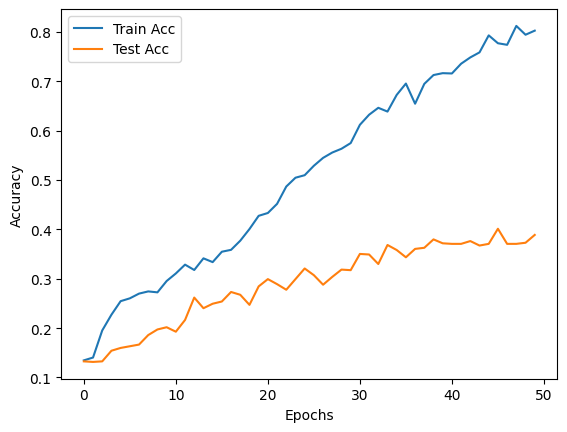

In [ ]:
import matplotlib.pyplot as plt

# Get the total number of epochs from the training history
num_epochs = len(cnn.history.history['accuracy'])

# Plot the accuracy values for all epochs
plt.plot(list(range(0, num_epochs)), cnn.history.history['accuracy'], label="Train Acc")
plt.plot(list(range(0, num_epochs)), cnn.history.history['val_accuracy'], label="Test Acc")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

# Step 1: Load the Saved Model
model_path = 'binary_cnn_model.h5'  # Replace with your saved model path
cnn = load_model(model_path)
print("Model loaded successfully.")

# Step 2: Prepare the Input Photo
def prepare_image(image_path, target_size=(64, 64)):

    img = load_img(image_path, target_size=target_size)  # Resize image
    img_array = img_to_array(img)  # Convert to NumPy array
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

image_path = '/content/Image_49 (11).jpg'  # Replace with the path to your input image
prepared_image = prepare_image(image_path)

# Step 3: Make Predictions
predictions = cnn.predict(prepared_image)
print("Class probabilities:", predictions)

# Step 4: Get Predicted Class Index and Label
class_index = np.argmax(predictions)  # Get the index of the highest probability
print("Predicted class index:", class_index)

# Map class index to a human-readable label
# Replace these labels with your actual class labels
class_labels = {0: 'Automatic Rifle', 1: 'Bows or Arrows', 2: 'Knifes', 3: 'Short Gun',
                4: 'Sniper', 5: 'Spears or Polearms', 6: 'SubMachine Gun', 7: 'Sword', 8: 'pistols'}

# Get the predicted label
predicted_label = class_labels.get(class_index, "Unknown")
print("Predicted class label:", predicted_label)


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Class probabilities: [[8.5910511e-01 4.8249774e-07 7.4043739e-05 9.3481314e-05 2.1584616e-03
  2.8942411e-06 1.3828383e-01 4.4434186e-05 2.3714770e-04]]
Predicted class index: 0
Predicted class label: Automatic Rifle


In [ ]:
import cv2
import numpy as np

def classify(frame):

    img=cv2.resize(frame,(64,64))


    if(np.max(img)>1):
        img = img/255.0

    img = np.array([img])
    prediction = cnn.predict(img)[0]

    classes = {v: k for k, v in x_train.class_indices.items()}

    cls = classes[np.argmax(prediction)]

    return cls

Given Image:



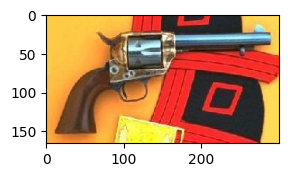


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction Name: pistols



In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

images = '/content/armas (807).jpg'

# The variable 'images' contains the image path,
# so we need to use 'images' instead of 'img' in cv2.imread()
image = cv2.imread(images, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # cv2 loads as BGR

print("Given Image:")
print()
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.show()
print()
resized_image = cv2.resize(image, (64, 64))
resized_image = resized_image.astype(np.float32)
out = classify(resized_image)
print("Prediction Name:",out)
print()
print("=================================================================")